In [19]:
import torch.nn as nn
import torch
import torch.utils.data as Data
from  sklearn.datasets import load_iris
import pandas as pd
import numpy as np
def getdata():
    train_data=load_iris()
    data=train_data['data']
    labels=train_data['target'].reshape(-1,1)
    total_data=np.hstack((data,labels))
    np.random.shuffle(total_data)
    train=total_data[0:120,:-1]
    test=total_data[120:,:-1]
    train_label=total_data[0:120,-1].reshape(-1,1)
    test_label=total_data[120:,-1].reshape(-1,1)
    return data,labels,train,test,train_label,test_label
data,labels,train,test,train_label,test_label = getdata()
# 数据预处理 归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train=scaler.transform(train)
# 4.对测试数据进行归一化处理
test=scaler.transform(test)

In [20]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier          # 导入随机森林的包
clf = RandomForestClassifier()
clf.fit(train, train_label)

# 预测
y_pred = clf.predict(test) # 利用拟合的决策树进行预测
y_true = test_label.reshape(1,-1)[0]
print(y_true)
print(y_pred)
accuracy = float((y_pred == y_true).astype(int).sum()) / (len(y_true))
print(accuracy)

[1. 2. 2. 2. 2. 1. 0. 1. 2. 2. 0. 1. 2. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 2. 1. 1. 0. 1.]
[1. 2. 1. 2. 2. 1. 0. 1. 2. 2. 0. 1. 2. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 2. 1. 1. 0. 1.]
0.9666666666666667


/home/sk49/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/sk49/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


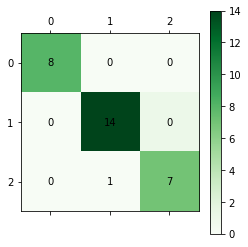

In [21]:
# 衡量模型性能

#true↓ predict→
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_pred, y_true)
#print(cm)
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')

In [22]:
# 分类报告
r = sm.classification_report(y_true, y_pred)
print('分类报告为：', r, sep='\n')

分类报告为：
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.88      0.93         8

   micro avg       0.97      0.97      0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

